In [54]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('tvmarketing.csv')
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
data.shape

(200, 2)

In [6]:
data.isna().sum()

TV       0
Sales    0
dtype: int64

<AxesSubplot:xlabel='TV', ylabel='Sales'>

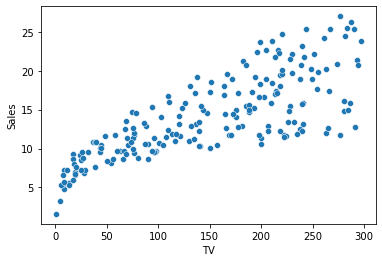

In [8]:
sns.scatterplot(x = 'TV' , y = 'Sales' , data = data)

## Splitting into test and train datasets

In [11]:
x = data['TV']
y = data['Sales']

In [12]:
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [13]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [15]:
x_train , x_test, y_train , y_test = train_test_split(x , y , train_size = 0.7 )

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [29]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


## Model building

###### model1

In [20]:
model = smf.ols('x~y' , data = data).fit()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

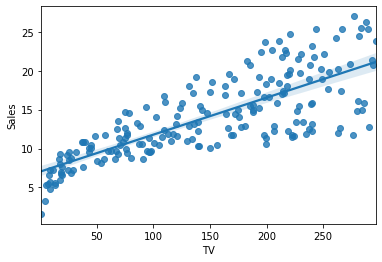

In [21]:
sns.regplot(x = x , y = y)

In [22]:
model.params

Intercept   -33.450228
y            12.871651
dtype: float64

In [23]:
model.rsquared

0.611875050850071

In [24]:
model.rsquared_adj

0.6099148238341623

###### model2

In [31]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()
model_2.fit(x_train,y_train)

LinearRegression()

In [42]:
print('intercept : ' ,model_2.intercept_)
print('co-eff : ', model_2.coef_)


intercept :  [6.84738128]
co-eff :  [[0.04917294]]


In [43]:
#prediction
y_pred= model_2.predict(x_test)

Text(0.5, 0, 'Index')

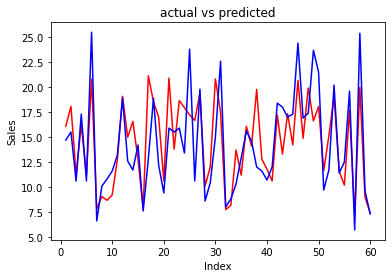

In [50]:
#Comparing y_pred and y_test
c = [i for i in range(1,61)]
figure = plt.figure()
plt.plot(c , y_pred , color = 'red')
plt.plot(c, y_test , color = 'blue')
plt.title("actual vs predicted")
plt.ylabel('Sales')
plt.xlabel('Index')

In [53]:
mse = mean_squared_error(y_test,y_pred)
mse

10.518236229115017

In [56]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.5628893432969448

In [ ]:
# this mse =10.5 means that this model is not able to match the 10 percent of the values
# r2 means that your model is 56% is accurate on test data .